## Lliurament tasca 6A: Visualització gràfica de Múltiples variables

Nivell 1
- Exercici 1
Realitza la pràctica del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

tips = pd.read_csv('tips.csv',sep = ',', encoding = 'utf-8')

tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
tips.shape
#amb la funció shape veiem les dimensions de la taula, 244 entrades, en 7 columnes

(244, 7)

In [5]:
tips.ndim
#ens retorna un int amb el numero d'eixos / dimensions de l'array. 

2

In [7]:
tips.columns
#ens retorna les etiquetes de les columnes del DataFrame

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [8]:
tips.dtypes
#ens retorna el tipus de dades q conté cada columna.

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [9]:
#afegim la columna tip_pct on calculem el percentatge de propina donada respecte al total de l'import.
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


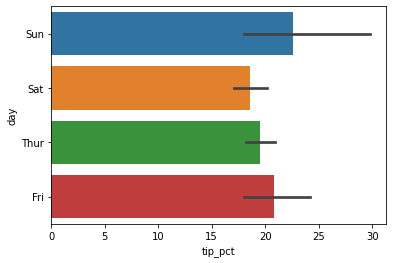

In [10]:
#fem un diagrama de barres orientat a l'eix vertical, avaluant la mitjana aritmètica de les propines per dia.
sns.barplot(x='tip_pct', y='day', data=tips, orient="h")
plt.show()

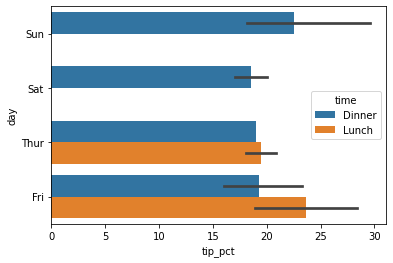

In [11]:
#ara ho fem afegint en quin moment del dia es produeixen, si al dinar o sopar.
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")

In [12]:
tips.describe()
#fent un describe tenim una visió estadística global de les valiables numèriques del DataFrame.

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [13]:
round(tips.describe(include='all'), 3)
#en inloure el parametre 'all' obtindrem el resultat de la funció describe incloent les variables categòriques.
#round(3) ens limita els decimals obtinguts a 3

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [14]:
#valors nuls en relacio amb el total de valors
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [15]:
#ara n'extreurem les dades estadístiques de la columna 'tip', arrodonit a 3 decimals.
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [18]:
#i ara fem el mateix però només amb el valor mig
round((tips['tip']).median(),3)

2.9

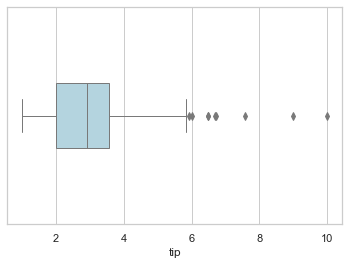

In [20]:
#boxplot de la variable 'tip'
sns.set(style="whitegrid")

ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, linewidth=1, width=0.3)

#Note: si ho faig tañ com suggereix el Notebook original:
#ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
#dóna el següent error:
#Vertical orientation ignored with only `x` specified.
#per això he ignorat el paràmetre'orient=v'

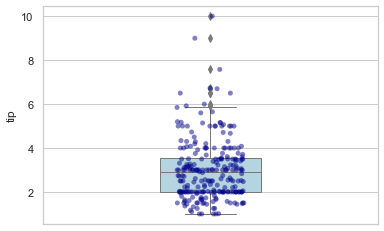

In [21]:
#combinem dos gràfiques diferents: la boxplot,  i l'stripplot ens genera un scatterplot.
#tenir el paràmetre 'alpha' ens permet jugar amb l'opacitat dels punts i veure d'una forma més ràpida la concentració de valors

ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

In [22]:
#comproben denou el tipus de dades de q disposem
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object

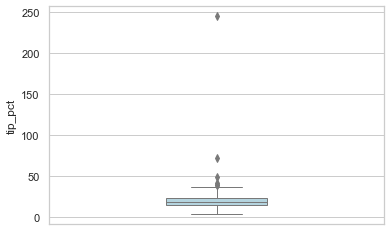

In [23]:
#ara veiem la relació entre el percentatge de propines i propines menors de 10

sns.boxplot(y="tip_pct", data=tips[tips.tip < 10],  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3);

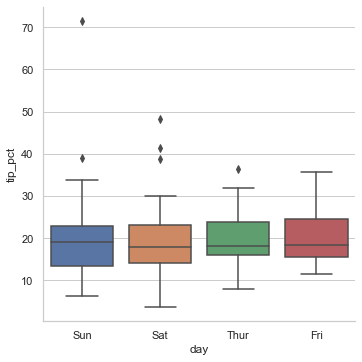

In [24]:
#visualització del percentatge de propines per dies
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

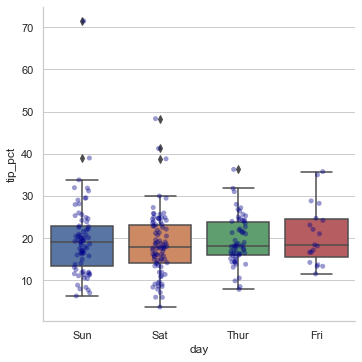

In [25]:
#combinem dos gràfiques diferents: la catplot, ens permet veure la relació entre variables numériques i categòriques. 
#l'stripplot ens genera un scatterplot amb una variable categòrica.
#tenir el paràmetre 'alpha' ens permet jugar amb l'opacitat dels punts i veure d'una forma més ràpida la concentració de valors.
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

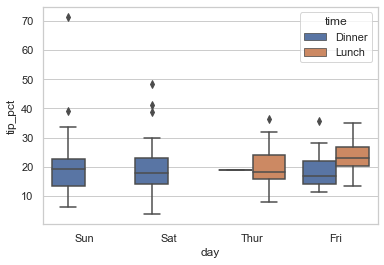

In [30]:
#Ara fem un boxplot amb el que mostrarem la distribució d'una variable respeste a d'altres dues.
#Les caixes ens mostren la distribució de les dades, els quartils i valors 'outliers'.
sns.boxplot(x='day', y='tip_pct', hue='time', 
               data=tips[tips.tip_pct < 245]);

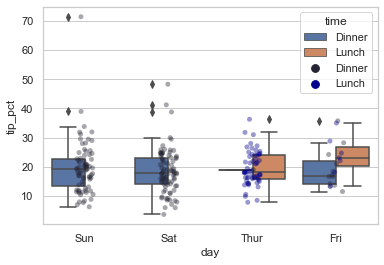

In [27]:
#Amb la convinació del boxplot i l'stripplot, podem mostrar totes les observacions i la seva distribució

sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

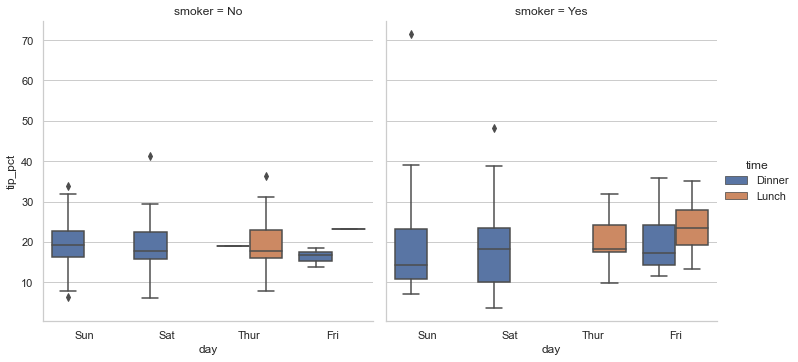

In [28]:
#els proper gràfic, el Catplot, és un tipus de gràfic complex que ens permet veure les relacions entre una variable numérica, 
#i una o més de categòriques, fent servir una o més representacions visuals.
#en aquest cas ens dóna les dades dividies en dos grups, si el client és o no fumador

sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

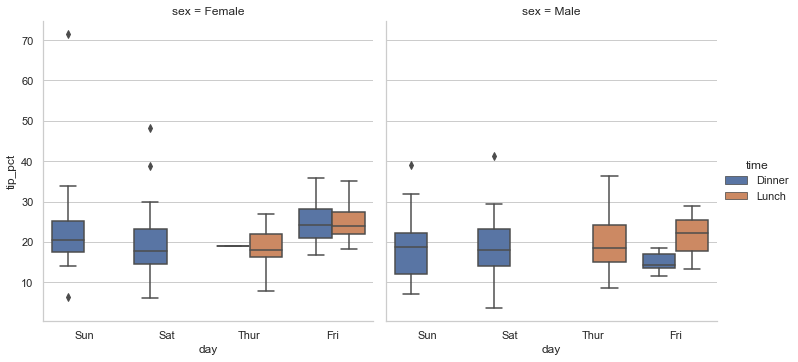

In [31]:
#tb la prodriem fer per sexe, etc.
sns.catplot(x='day', y='tip_pct', hue='time', col='sex',
               kind='box', data=tips[tips.tip_pct < 245]);
